<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-network" data-toc-modified-id="Load-network-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load network</a></span></li><li><span><a href="#Finding-communities" data-toc-modified-id="Finding-communities-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Finding communities</a></span><ul class="toc-item"><li><span><a href="#Girvan–Newman-algorithm" data-toc-modified-id="Girvan–Newman-algorithm-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Girvan–Newman algorithm</a></span></li><li><span><a href="#Fluid-Communities-algorithm" data-toc-modified-id="Fluid-Communities-algorithm-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Fluid Communities algorithm</a></span></li><li><span><a href="#Adjusted-Fluid-Communities-algorithm" data-toc-modified-id="Adjusted-Fluid-Communities-algorithm-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Adjusted Fluid Communities algorithm</a></span></li></ul></li><li><span><a href="#Improve-visualization" data-toc-modified-id="Improve-visualization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Improve visualization</a></span></li></ul></div>

Just by reading the title you must think these are the words of a crazy man. Of course, I am half joking, but half talking seriously. We are going to use a common, down to Earth problem, as an excuse to introduce some of the techniques and algorithms used network analysis and how immediate and easy it is to start applying them to real datasets with Python and the <a href="https://networkx.org/">NetworkX</a> library. Without further delay, let us start our crazy adventure.

If you have ever been to a wedding before, it is highly likely that, after a nice ceremony in the church where everyone behaved with elegance and grace, then you have eaten an absurdly high amount of food. That is usually my favorite part. You get to sit and eat for hours until your body suddenly feels 30 years older.

And you ate that food sitting in a table with other people. If you are lucky, you like those people and conversation is fluid. Usually, you do not get to sit wherever you want. Usually, it is the bride and the groom who have carefully chosen who gets to sit with whom. And most often than not they choose wisely, and you end up spending your time with your family, or friends, or your coworkers.

Let’s pretend you are the one who is getting married. How do you divide your wedding guests in different tables? You must follow some criteria. Placing them at random can be fun for sure, but it is not the distribution that is going to make your guests feel more comfortable or appreciated. 
Unless you are the biggest troll on Earth, you would put people who know each other at the same table.

So you sit down with your laptop, take the list of guests, and starts dividing them into groups of people who is close to each other. It is a necessary task, but it must be a boring one. What if we could do it with less effort? What if we could use some algorithm to create the different groups?
Here is where network analysis comes to help.

If you have at your disposal the list of guests and know which of them know each other, you can model this information mathematically as a graph or a network (both terms are mathematically equivalent, although sometimes one is used in some contexts more than the other).
In general terms, a network is a group of vertices or nodes connected between them by edges or links. In our case, the nodes are our wedding guests and there is a link connecting a pair of nodes if those two people already know each other.

Once you have your guest’s connections modelled appropriately as a network, you will be able to apply some sort of algorithm that will find groups of nodes who are densely connected to each other, and hence could be comfortably sat at the same table.

In network nomenclature, those groups are called communities or clusters, and there are lots of different algorithms of finding them. Each algorithm uses a different criterion for what is the optimal division of the nodes into communities. Some of them are easier to understand than others, and some of them are more closely related to our problem at hand than others.
It is not my intention to review them, because it is an infinite field.
However, we are going to review some simple ones with extensive use that have proved over and over to work very well in practical situations.

All of this sounds nice, but now we need to do it. This is the difficult but interesting part.
We need to do mainly two things: getting our guest network and finding the communities.
Thanks to the powerful interface of <a href="https://networkx.org/">NetworkX</a>, finding the communities in a network is very straightforward and I will spend more time explaining the algorithm than actually writing the code. You’ll see it is very simple.

Surprisingly (or maybe not), the difficult part is to come up with a way of creating a guest network that is automatic and unambiguous. Writing it manually is not an option. I mean, it is an option, but a tedious one.
The solution that came to my mind was using an online social network, specifically Facebook. Most of your guests are likely going to be your friends in that network, apart from your aunt who does not know what YouTube is. And if they know each other (because they are friends, cousins, coworkers or whatever), they will also be friends in Facebook and you can know that because they will appear as mutual friends.
Therefore, your guest network will be your Facebook network (don’t forget to complete the network manually with your aunt who does not even have a smartphone).

Great! We solved it! Not so fast. I don’t know if you noticed before, but there is not button on Facebook with the name “Download network”. It would be nice, but there isn’t. We need to scrape that information before. As this task itself is complex enough to deserve its own project, you can read my other article [Read your network of friends in Facebook by scraping with Python](Read_your_network_of_friends_in_Facebook_by_scraping_with_Python.ipynb) to see how to do it. It will teach you how to apply web scraping with Python (using <a href="https://www.selenium.dev/"> Selenium</a> library) to get the mutual friendship network.

Go [there](Read_your_network_of_friends_in_Facebook_by_scraping_with_Python.ipynb) and come back when you have completed it. You finished? Great, let’s continue.

**Note**
If you only want to do it but are not interested in learning how, you can also download a web app I developed using Django that does all this. Download it from the GitHub [repository](https://github.com/rubchume/FacebookFriendNetworkAnalyzer) and follow the instructions in the `Readme.md` file.

# Load network

If you have followed the instructions on the other [article](Read_your_network_of_friends_in_Facebook_by_scraping_with_Python.ipynb), you will have end up with a text file in json format that will look like this:

```
{
    "friend_list": [
        {
            "user_id": "12345",
            "name": "My best friend name",
            "link": "https://www.facebook.com/mybestfriend",
            "gender": "MALE"
        },
        {
            "user_id": "67890",
            "name": "Jessica Rabbit",
            "link": "https://www.facebook.com/jessicarabbit",
            "gender": "FEMALE"
        },
        ...
    ],
    "mutual_friends": {
        "12345": [
            {
                "user_id": "245345",
                "name": "My other best friend",
                "link": "https://www.facebook.com/youcouldbemorecreative",
                "gender": "MALE"
            },
        ],
        "67890": [
            {
                "user_id": "245345",
                "name": "Gandalf",
                "link": "https://www.facebook.com/greywizard",
                "gender": "MALE"
            },
            {
                "user_id": "999876",
                "name": "Hermione",
                "link": "https://www.facebook.com/mugglewizard",
                "gender": "FEMALE"
            }
        ]
    }
} 
```

It has a very basic schema. It is an object with two fields: `friend_list` and `mutual_friends`. `friend_list` is an array of users that are friends with you, where each user is represented by an object with four fields:
- `user_id`. Unique identifier of user in Facebook.
- `name`. Name of the user.
- `link`. URL of the user's profile.
- `gender`. Gender of the user.

`mutual_friends` is an object where each field has one of your friends' `user_id` as the key and the value is an array of users that you and your friend have in common, this is, mutual friends. For example, in the example above, my best friend and I have only one mutual friend, which is my other best friend. And my friend Jessica Rabbit and I have as mutual friends Gandalf and Hermione. However, that does not imply that Hermione and Gandalf are friends, it just means that they are both friends with Jessica Rabbit.

That is all the information we need to create a network representation and load it into NetworkX. The first step is reading the file and loading the information into a dictionary, since the translation from a json file into a Python dictionary is straightforward and convenient:

In [1]:
import json


filename = "sample_data/my_anonymized_network.json"

with open(filename, "r", encoding="utf-8") as file:
    network = json.load(file)

Then we are going to create a simple undirected graph with NetworkX.
A graph is simply a network. The members of the network (your Facebook friends in this case) are the nodes. Each node must have a label, which will be a unique identifier, this is, there are no two nodes with the same label.

Each node can have attributes that describe it.
In our case, the label for each node will be the `user_id` and as attributes we will load the name and the gender:

In [2]:
import networkx as nx


graph = nx.Graph()
graph.add_nodes_from([
    (
        friend["user_id"],
        dict(name=friend["name"], gender=friend["gender"])
    ) 
    for friend in network["friend_list"]
])

A graph, besides nodes, it also has edges, which are connections between nodes. There must be and edge between all your friends who are also friends between them.
NetworX allows to load edges from a list of 2-item tuples, where each of the two elements are the node labels of the two nodes that are connected.

In [3]:
edges = []
for friend_id, mutual_friends in network["mutual_friends"].items():
    edges += [
        (
            friend_id,
            mutual_friend["user_id"]
        ) for mutual_friend in mutual_friends
    ]
    
graph.add_edges_from(edges)

Great! Now our graph is created. We just need to visualize it with the `draw` function.

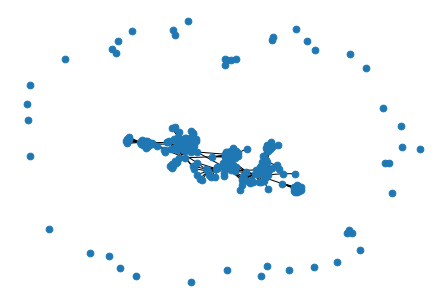

In [4]:
nx.draw(
    graph,
    node_size=45
)

Uhmmmm... a little strange right? Take a look at the image. There are a few nodes in the periphery that are barely connected to other nodes of the network. Those are your friends with whom you have none or almost no connections in common. They are probably people who you only met once and have not represented any influence in your life since they are not friends with any other of your friends.

In the center of the image, there are the rest of my friends, which are tightly connected. In this big "island" of the center, every node can reach every other node jumping through common friends. However, the little "islands" in the periphery, which are composed of one or very few nodes, cannot reach anyone else. They are completely isolated.

A group of nodes where all of them can reach every other node through some path of connections (no matter how long it is), what I called an "island", is really known as a **connected component**.

From now on we are going to remove the isolated friends from the periphery, since they do not add interesting information. I order to do that, we just need to find the biggest component (the one in the center) and keep it.

In [5]:
biggest_component_nodes = max(nx.connected_components(graph), key=len)
graph = graph.subgraph(biggest_component_nodes)

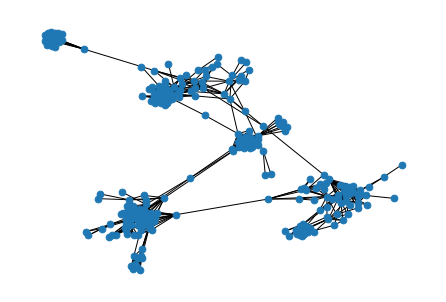

In [6]:
nx.draw(
    graph,
    node_size=45
)

This is much better! Now we can see in more detail the underlying structure of my social connections.

Sidenote: as visualizations can be tricky to use, from now on I am going to use a custom function to plot graphs. It is simply a convenient wrapper for the `draw` function. You don't need to use it, but I like it for its convenience. Also, I am going to pre-compute the position of the nodes in the 2D representation so we can keep it through all the plots instead of generating new positions each time we plot.

In [7]:
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def draw_graph(graph, node_scores=None, node_communities=None, label_proportion=0.1):
    
    def communities_to_node_community_map():
        node_community_map = {}
        for i, community in enumerate(node_communities, start=1):
            node_community_map.update({node: i for node in community})

        return pd.Series(node_community_map).reindex(graph.nodes).fillna(0).astype("int64")
    
    def get_random_labels(p):
        labels = {}
        for userid, name in nx.get_node_attributes(graph, 'name').items():
            if np.random.binomial(1, p) == 1:
                labels[userid] = name

        return labels

    cmap = cm.get_cmap("Paired")
    num_colors = len(cmap.colors)
    
    fig, ax = plt.subplots(1, 1, figsize=(20, 20))

    color = None

    if node_scores is not None:
        node_scores_series = pd.Series(node_scores).loc[list(self.graph.nodes)]
        threshold_quantile = 1 - label_proportion
        nodes_with_score_higher_than_threshold = node_scores_series[
            node_scores_series >= node_scores_series.quantile(threshold_quantile)
        ].index
        labels = {
            node: graph.nodes[node]["name"]
            for node in nodes_with_score_higher_than_threshold
        }
        color = node_scores_series
    else:
        labels = get_random_labels(label_proportion)
        if node_communities is not None:
            node_community_map = communities_to_node_community_map()
            color = cmap(node_community_map.values % num_colors)

    return nx.draw(
        graph,
        pos=node_positions,
        node_size=45,
        node_color=color,
        edge_color=(0, 0, 0, 0.1),
        ax=ax,
        with_labels=True,
        labels=labels
    )

node_positions = nx.spring_layout(graph, seed=0)

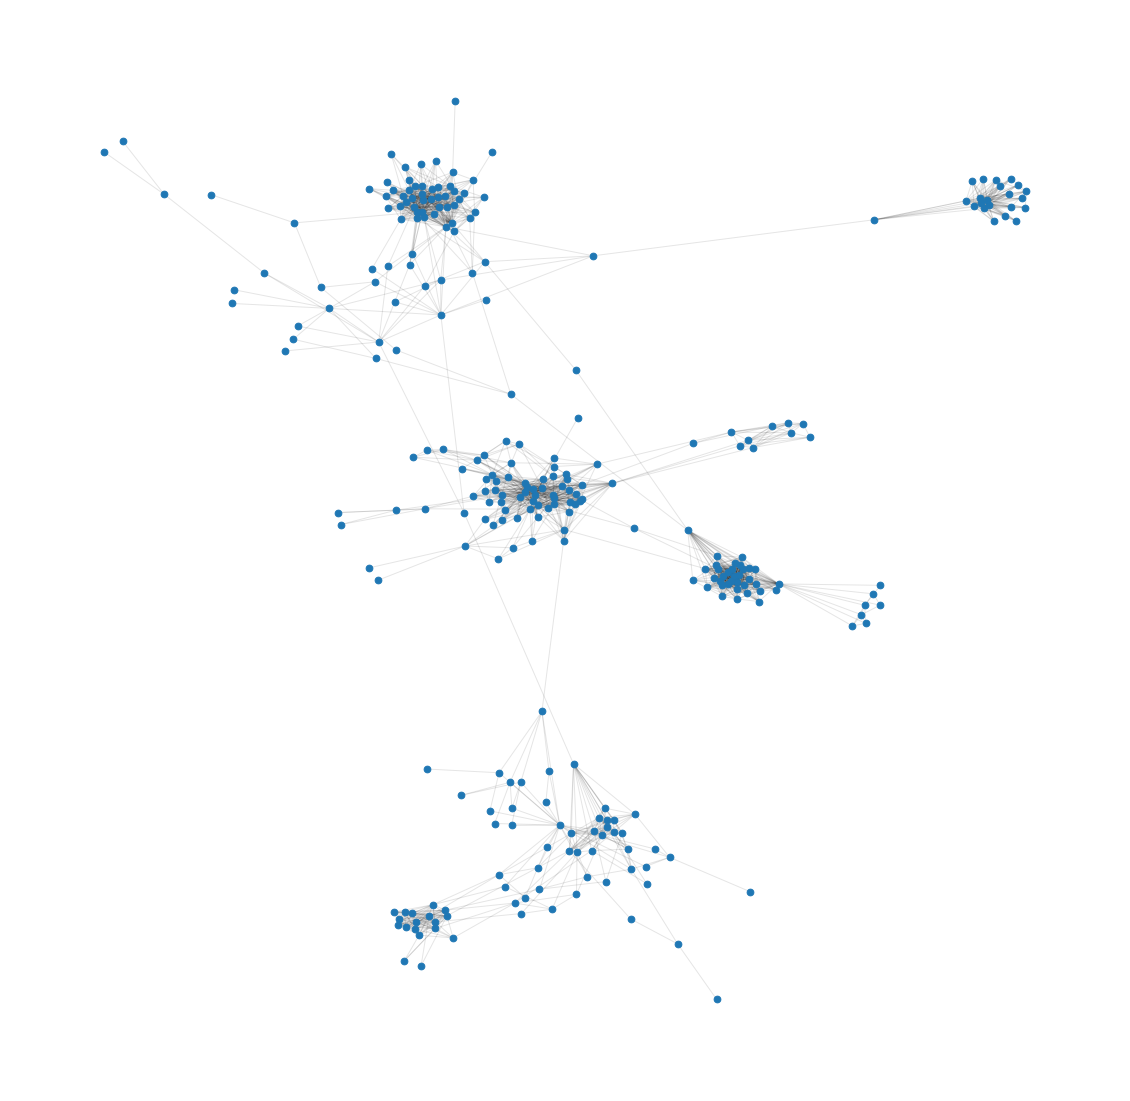

In [8]:
draw_graph(graph, label_proportion=0)

Well, now what? Now we are able to face the problem at hand: How do we divide those nodes (persons) in different tables?


# Finding communities

The problem of dividing people in tables is just an excuse to informally introduce the more formal concept of community. A community is just a group of nodes that are "close" to each other. When I say "close" it can sound somewhat vague, but it is not my intention to hide a more formal and rigorous definition. It is just that there is not a unique definition of community. There are multiple criteria one can follow, and each one leads to a different solution. The only thing they have in common is that nodes in a community should be "close" to each other.

We are going to use some simple ones that are easy to understand and work very well. But first, let's follow a more informal approach. How would you divide the network above? Even if we do not have yet an unambiguous definition of community, we can clearly see that are groups of nodes that are more tightly connected than the rest.

Most people would have no problem finding different communities from the image above and will reach approximately the same community configuration:

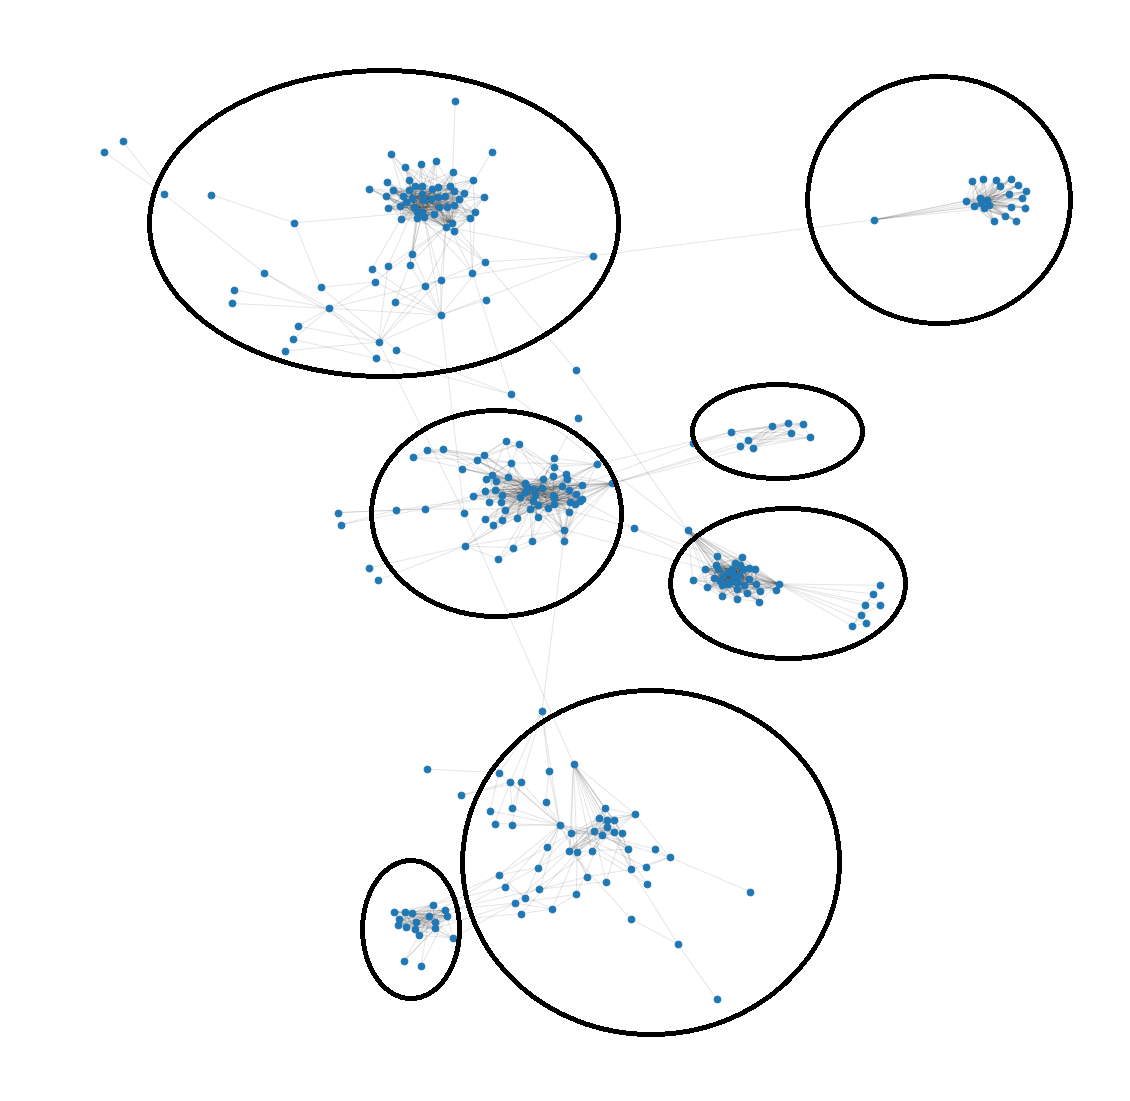

In [9]:
from IPython import display

display.Image("sample_data/VisualCommunities.png")

But this task that the human brain is so good at, is not so straightforward to solve for a computer. We need some algorithm that emulates our mind.

## Girvan–Newman algorithm

The algorithm we are going to look at is the <a href="https://en.wikipedia.org/wiki/Girvan%E2%80%93Newman_algorithm">Girvan-Newman algorithm</a>.

Its principle is simple. You take the network, seek out the most important connection (edge), and remove it. If the network has been divided into two islands (connected components), then you have found two communities! Congratulations. However, if not, you just find the most important connection from the remaining ones and remove it. And so on until the number of connected components increases from 1 to 2.
What if I want to divide my nodes in 3 communities? You just find 2 communities first, and then keep removing edges by descending order of importance.

But wait. What is an important connection? How do you measure importance? In general, in any way that comes to your mind. But usually, the algorithm uses what it is known as **betweenness centrality**.
Every edge/connection of the graph has a score known as betweenness centrality. It measures how much removing that edge would impact the network.

The way to calculate it is this. You take every possible pair of nodes of the network, and for each pair pretend that one node wants to send a message to the other. If they are connected, they just need to use the edge between them. However, if they are not, they will need to find a path through other nodes. The best path is the shortest path, this is, the one with less intermediary nodes.

The betweenness centrality of an edge is the proportion of shortest paths that pass through the edge. In other words, the most important edge, the one with the highest betweenness centrality, is the one that, if removed, would force more node pairs to find a new shortest path between them.

All this wordy explanation contrasts with the simplicity of the <a href="https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html">code</a> needed to apply the algorithm:

In [10]:
import itertools
from networkx.algorithms.community.centrality import girvan_newman


community_divisions_generator = girvan_newman(graph)

max_number_of_communities = 10

community_divisions = {
    num_communities: communities
    for num_communities, communities in enumerate(
        itertools.islice(community_divisions_generator, max_number_of_communities - 1),
        start=2
    )
}

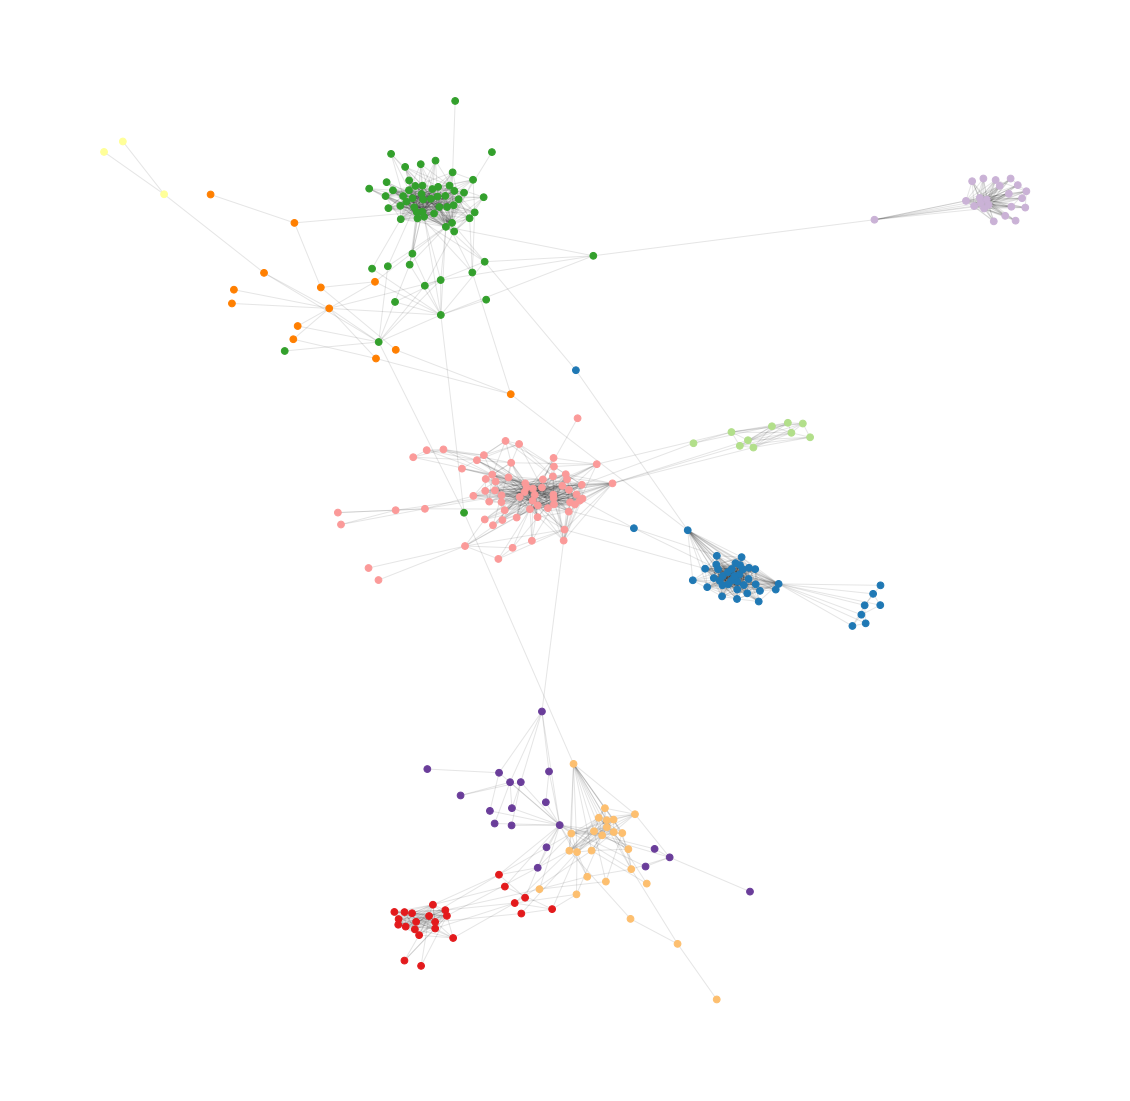

In [11]:
num_communities = 10
draw_graph(graph, node_communities=community_divisions[num_communities], label_proportion=0)

We did it!!!

As we can see, removing the most important edge until you get 10 connected components (communities) gives a good intuitive division that is very similar to what we would have done visually. You can experiment with more or less connected components.

There is, nonetheless, a little problem. Remember our original problem? We want to put these people in tables, but the biggest community we found has 69 people. I have never seen a table with so many seats.

Ideally, we would want a way of finding communities but limiting the size of them.

## Fluid Communities algorithm

Unfortunately, I don't know of an algorithm in the NetworkX API that has the property of keeping al communities with the same size.

However, there is an algorithm that accomplishes something kind of similar. It is called <a href="https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.asyn_fluid.asyn_fluidc.html">Fluid Communities algorithm</a>. The explanation of this algorithm usually uses the metaphor of a fluid filling all the network.

In simple words, what the algorithm does is to initialize k nodes to k different communities. Then, it iterates through all the nodes in a random order and assigns to them the community where its connections represent a higher proportion relative to the size of the community. It repeats the process until no more updates occur. In other words, the algorithm stops when all the nodes are in the community where its friends represent a higher proportion.

In the table analogy, every person is assigned to the table where, given that a person is picked at random, it has the highest chance of being a friend of the person. It is a nice idea, right? 

In the simplest words I can think of, with this approach we are maximizing the probability of begin seated next to a friend. No more, no less.

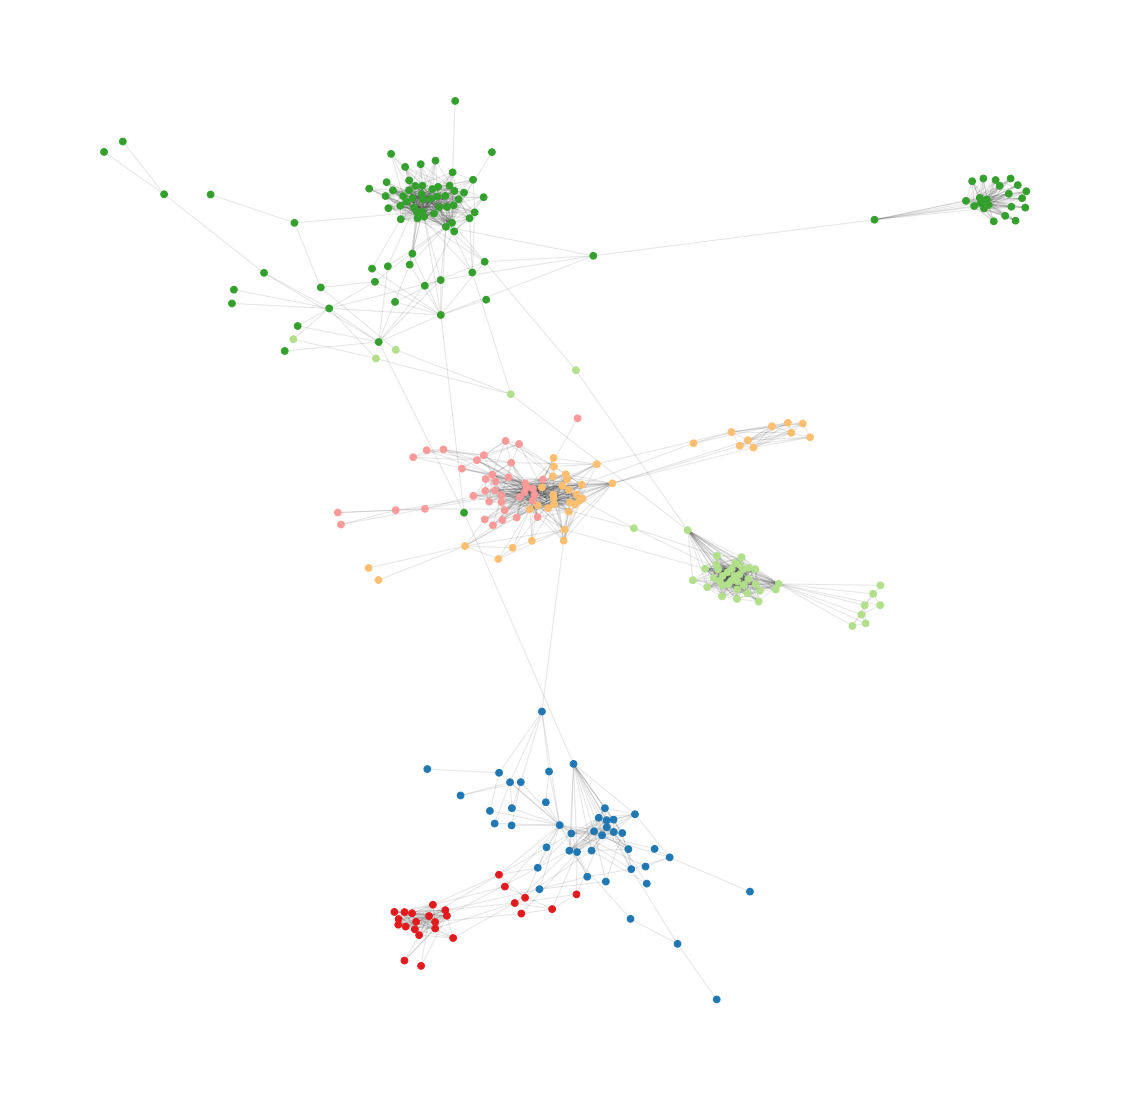

In [12]:
from networkx.algorithms.community.asyn_fluid import asyn_fluidc

community_division = list(asyn_fluidc(graph, 6))
draw_graph(graph, node_communities=community_division, label_proportion=0)

As we see, not all communities have the same size, but at least they are more equal than in the Girvan-Newmann algorithm

## Adjusted Fluid Communities algorithm

To achieve same size communities without messing it too much, we must get creative.
I am going to propose a simple algorithm that would run after the usual fluid communities algorithm in order to adjust the sizes.

It is not very sophisticated, but it does the work and, at least with my group of friends, it worked well. I mean, the resulting table configuration was not incoherent at all.

The approach is the next. First, we calculate what is the minimum number of members each group must have. You can set the minimum to any number, but it must be always equal or less than
$$
\left\lfloor{\frac{N}{k}}\right\rfloor
$$
where $N$ is the number of nodes and $k$ the number of groups.

Then we iterate through every group that is smaller than it should be. For each one, we get the friends of any member of the small group that belong to some group that has more members than the minimum required. Bring to the group the one that has the highest proportion of friends in the small group. Repeat the process until the small group has achieved the minimum number required.
If it is impossible to achieve the minimum size because all the friends are in also small groups, then move to another small group.

Repeat the process for all groups until all of them have achieved the minimum size. 

In [13]:
def get_friends(node, graph):
    return pd.Series([friend for _, friend in graph.edges(node)]).unique()


def communities_to_node_community_map(graph, communities):
    node_community_map = {}
    for i, community in enumerate(communities, start=1):
        node_community_map.update({node: i for node in community})

    return pd.Series(node_community_map).reindex(graph.nodes).fillna(0).astype("int64")


def node_community_map_to_communities(node_community_map):
    return [set(group.index) for group_id, group in node_community_map.groupby(node_community_map)]


def get_proportion_of_friends_in_group(node, group_id):
    friends = get_friends(node, graph)
    
    group = node_community_map.loc[node_community_map == group_id].index
    group_size = len(group)
    
    friends_in_group = [friend for friend in friends if friend in group]
    proportion = len(friends_in_group) / group_size
    
    return proportion


def bring_nodes_to_community(community_id):
    def is_small_community():
        return community_sizes[community_id] < minimum_size
    
    community_members = get_community_members(community_id)
    friends = get_friends(community_members, graph)
    
    if is_small_community():
        big_enough_communities = community_sizes.loc[community_sizes > minimum_size].index
    else:
        big_enough_communities = community_sizes.loc[community_sizes > community_sizes[community_id]].index
    
    node_big_community_map = node_community_map.loc[node_community_map.isin(big_enough_communities)]
    big_community_friends = node_big_community_map.reindex(friends).dropna().index
    
    proportions = {}
    for friend in big_community_friends:
        proportion = get_proportion_of_friends_in_group(friend, community_id)
        proportions[friend] = proportion

    proportions = pd.Series(proportions, dtype="float64")

    if proportions.empty:
        return None
    
    return proportions.idxmax()

        
def get_community_members(community_id):
    return node_community_map.loc[node_community_map == community_id].index


def get_community_sizes():
    return node_community_map.groupby(node_community_map).count()

In [14]:
import math

minimum_size = math.floor(graph.number_of_nodes() / len(community_division))

node_community_map = communities_to_node_community_map(graph, community_division)

community_sizes = get_community_sizes()

big_communities = [id for id, size in community_sizes.items() if size > minimum_size]
node_big_community_map = node_community_map.loc[node_community_map.isin(big_communities)]

community_ids = node_community_map.unique()        

while any(community_sizes < minimum_size):
    old_community_sizes = community_sizes.copy()
    for community_id in community_ids:
        nodes_to_bring = bring_nodes_to_community(community_id)
        if nodes_to_bring:
            node_community_map[nodes_to_bring] = community_id
            community_sizes = get_community_sizes()
    
    if community_sizes.equals(old_community_sizes):
        break


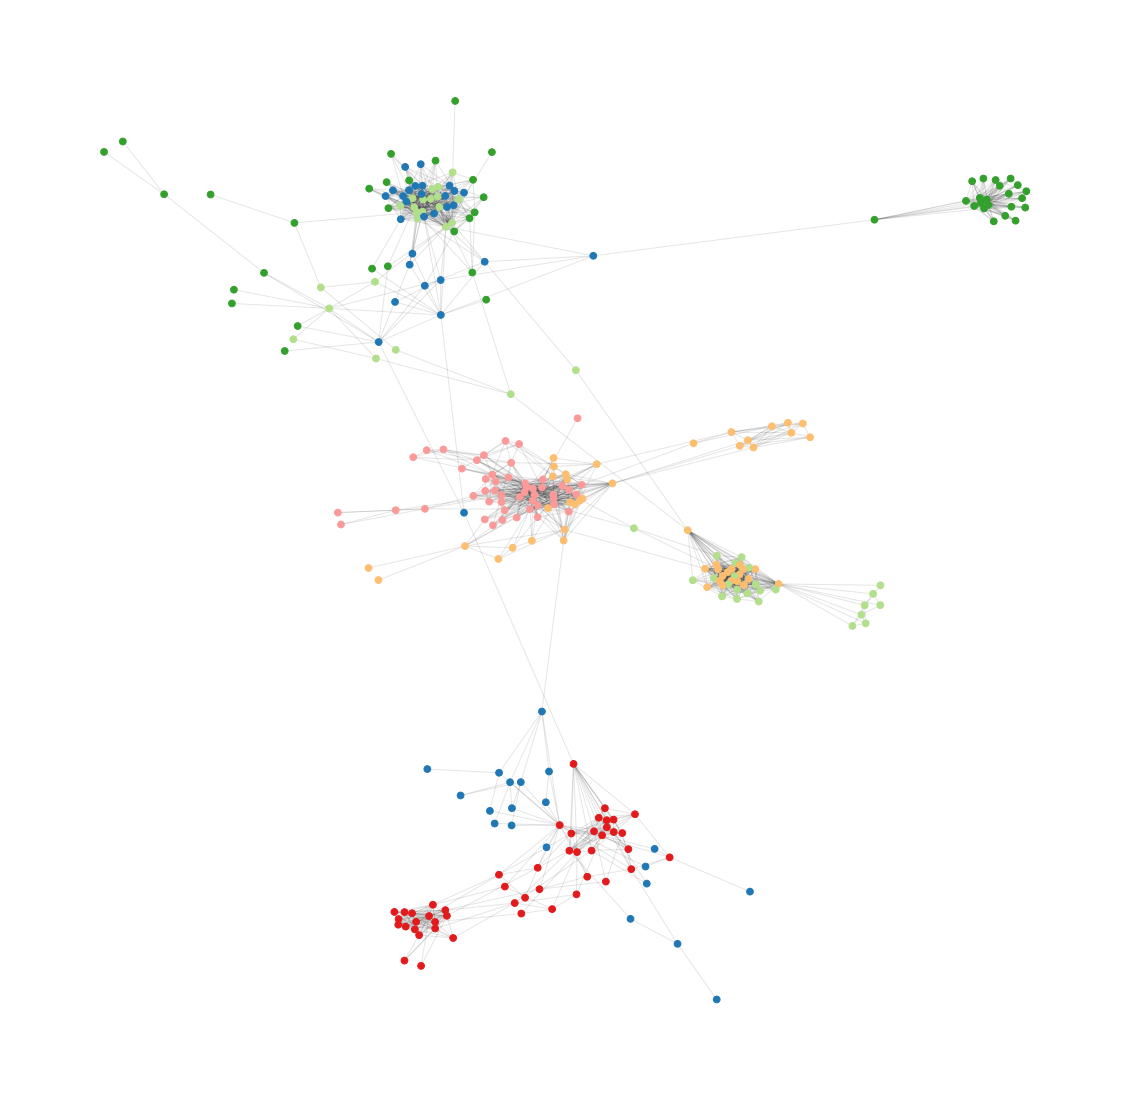

In [15]:
new_communities = node_community_map_to_communities(node_community_map)
draw_graph(graph, node_communities=new_communities, label_proportion=0)

# Improve visualization

It would be nice to be able to see the names of the people in the network but showing them would clutter the image.
A solution to this is to use an interactive graph, so when you place the mouse over any node, the name appears.

Unfortunately, NetworkX does not offer that functionality (at least that I am aware of).
However, we can build our own visualization with [Plotly](https://plotly.com/).

In [16]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
plotly.offline.init_notebook_mode(connected=True)

In [17]:
positions = [position for _, position in node_positions.items()]

x, y = zip(*positions)

In [18]:
lines = []
for a, b in graph.edges():
    xa, ya = node_positions[a]
    xb, yb = node_positions[b]
    
    lines.append(
        go.Scatter(
            x=[xa, xb],
            y=[ya, yb],
            line_color="black",
            line_width=1,
            opacity=0.2,
            showlegend=False,
            hovertemplate=None,
            mode="lines"
        )
    )

In [19]:
node_communities = communities_to_node_community_map(graph, community_division)

cmap = px.colors.qualitative.Plotly

go.Figure(
    data=lines + [
        go.Scatter(
            x=x,
            y=y,
            mode="markers",
            marker=dict(
                color=node_communities.values,
                cmin=1,
                cmax=len(cmap),
                colorscale=cmap,
            ),
            customdata=node_communities,
            text=[name for _, name in nx.get_node_attributes(graph, "name").items()],
            hovertemplate="%{text} (%{customdata})<extra></extra>",
            showlegend=False,
        )
    ],
    layout=go.Layout(
        xaxis=go.layout.XAxis(
            showticklabels=False,
            showgrid=False,
            zeroline=False,
        ),
        yaxis=go.layout.YAxis(
            showticklabels=False,
            showgrid=False,
            zeroline=False,
        ),
        width=1000,
        height=1000
    )
)

And this is it! Contratulations for arriving until the end. Now you can explore more network algorithms in the NetworkX page (or using another library) and come up with new ways of visualize it.